## Latar belakang masalah

  Sekarang ini banyak sekali orang yang tidak membuat sampah pada tempatnya, berangkat dari masalah tersebut akhirnya dibuatlah sebuah sistem yaitu penampungan sampah tersentrilasasi yang dibuat dan diurus oleh desa, orang tidak lagi membuang sampah sembarangan melainkan harus menyetorkan sampahnya ke tempat penampungan sampah tersebut.
  
  Di sisi lain masih banyak orang yang malas untuk menyetorkan sampahnya ke tempat penampungan sampah tersebut, dan lebih memilih membuang sampahnya di sungai yang berada di depan rumahnya.

  Dari hal inilah pemerintah desa akhirnya memiliki ide dan rencana untuk melakukan clustering terhadap data pembuangan sampah dari masing-masing orang tersebut, datanya berisi ID pengguna, lalu Berat Sampah (kg/bulan), selanjutnya ada Frekuensi setor sampah per bulan, dan jenis sampah favorit mereka.

  Hasil dari clutering tersebut akan digunakan untuk menentukan tren sampah favorit dan menentukan reward bagi orang-orang yang telah mengumpulkan sampah dan data tersebut juga bisa dijadikan acuan oleh pemerintah desa setempat untuk mencari solusi bagi orang yang jarang menyetorkan sampahnya ke tempat pembuangan sampah dan memilih untuk membuang sampah sembarangan.

  Catatan penting : kenapa tidak menggunakan seleksi kondisi biasa tapi malah clustering?, jadi disini kami itu ingin reward yang diberikan kepada user itu dinamis, tidak mungkin jumlah sampah tiap minggunya itu sama, dan tidak mungkin juga frekuensi setor sampahnya itu sama, jadi rajin disini itu nilainya tidak pasti, bisa saja 3 kali setor sampah dibilang rajin, dan bisa juga 6 kali setor sampah dibilang rajin, jadi rajin disini itu tergantung dari rata-rata frekuensi dan berat sampah yang disetorkan oleh user lain juga.

## Pembuatan Dummy Dataset
Disini dibuat dataset untuk orang yang menyetorkan sampahnya ke tempat penampungan sampah. Terdapat dua bulan yang berbeda yaitu hasil setoran pada bulan Januari dan Februari. Dataset ini akan di analisis untuk menentukan reward karena telah menyetorkan sampahnya ke tempat penampungan sampah dan tidak membuangnya secara sembarangan.

### Dataset Januari

In [257]:
import pandas as pd
import numpy as np

jumlahWarga = 50

# Disini ada dua dataset
# Dataset bulan januari
np.random.seed(30)
identitas_warga_januari = [f"warga_{i+1}" for i in range(jumlahWarga)]
frekuensi_buang_januari = np.random.randint(1,15, jumlahWarga)
berat_buang_januari = np.random.uniform(0.5, 5.0, jumlahWarga).round(2)

berat_total_jan = (frekuensi_buang_januari*berat_buang_januari)

df_warga_februari = pd.DataFrame({
    "Warga": identitas_warga_januari,
    "Frekuensi Buang": frekuensi_buang_januari,
    "Berat Sampah (kg)": berat_buang_januari,
    "Berat Sampah Total (kg)": berat_total_jan
})

print(f"\nData Warga Pada Januari Sebelum Diolah:")
display(df_warga_februari)





Data Warga Pada Januari Sebelum Diolah:


,Warga,Frekuensi Buang,Berat Sampah (kg),Berat Sampah Total (kg)
0,warga_1,6,3.87,23.22
1,warga_2,6,2.24,13.44
2,warga_3,14,2.19,30.66
3,warga_4,14,3.37,47.18
4,warga_5,5,1.21,6.05
5,warga_6,13,4.86,63.18
6,warga_7,8,4.89,39.12
7,warga_8,3,0.76,2.28
8,warga_9,6,1.68,10.08
9,warga_10,12,1.43,17.16


### Dataset Februari

In [258]:
import pandas as pd
import numpy as np

jumlahWarga = 50

# Dataset bulan februari
np.random.seed(40)
identitas_warga_februari = [f"warga_{i+1}" for i in range(jumlahWarga)]
frekuensi_buang_februari = np.random.randint(1,15, jumlahWarga)
berat_buang_februari = np.random.uniform(0.5, 5.0, jumlahWarga).round(2)

berat_total_jan = (frekuensi_buang_februari*berat_buang_februari)

df_warga_februari = pd.DataFrame({
    "Warga": identitas_warga_februari,
    "Frekuensi Buang": frekuensi_buang_februari,
    "Berat Sampah (kg)": berat_buang_februari,
    "Berat Sampah Total (kg)": berat_total_jan
})

print(f"\nData Warga Pada februari Sebelum Diolah:")
display(df_warga_februari)





Data Warga Pada februari Sebelum Diolah:


,Warga,Frekuensi Buang,Berat Sampah (kg),Berat Sampah Total (kg)
0,warga_1,7,0.93,6.51
1,warga_2,12,2.90,34.80
2,warga_3,8,1.78,14.24
3,warga_4,6,3.92,23.52
4,warga_5,9,4.64,41.76
5,warga_6,9,3.54,31.86
6,warga_7,3,4.22,12.66
7,warga_8,2,4.90,9.80
8,warga_9,13,0.87,11.31
9,warga_10,8,2.86,22.88


## Penentuan model yang akan digunakan
Jadi disini model yang akan digunakan adalah k-means karena tujuan dari project ini adalah memetakan pembuangan sampah ke tempat penampungan oleh warga, dan pembuangan terbanyak akan mendapatkan reward.

Alasan tidak memakai seleksi kondisi biasa yaitu karena ketika kita menggunakan seleksi kondisi biasa maka sistem rewardnya tidak bisa dipetakan secara dinamis berdasarkan data, melainkan harus ditentukan batas dari seleksi kondisi untuk rewardnya tersebut.

Contohnya ketika menggunakan seleksi kondisi biasa maka pembuat program harus menentukan batasan secara manual, misalnya kategori rajin itu ketika warga membuang sampah ke penampungan sebanyak 4 kali dalam sebulan, tetapi kalau seperti ini artinya batasan tersebut itu statis dan kalau rata-rata warga yang membuang sampah pada tempat penampungan adalah 4, maka kategori rajin akan memiliki banyak anggota dan akan merugikan sistem reward.

Solusinya adalah dengan menggunakan k-means, dengan algoritma ini kita dapat mengelompokkan warga berdasarkan kategori secara adil dengan berdasarkan acuan data saat ini, misalnya saja pada bulan pertama rata-rata dari warga membuang sampah sebanyak 7 kali ke dalam kategori "Biasa saja", lalu yang nilainya lebih banyak dari rata-rata digolongkan ke kategori "Rajin". Nah apabila pada bulan berikutnya tren dari pembuangan sampah ini naik, sehingga rata-rata warga membuang sampah sebanyak 9 kali ke tempat pembuangan sampah, maka algoritma k-means akan melakukan clustering terhadap data tersebut secara dinamis sehingga batasan untuk masuk ke kategori "Biasa saja" akan sesuai dengan data yang ada saat ini. Dan pengelompokkan ini akan berguna sebagai bahan evaluasi pemerintah desa dalam mengelola tempat penampungan sampah tersebut.



### Normalisasi dataset pada bulan januari

In [259]:
data_januari = df_warga_januari.copy()

data_asli1 = data_januari[['Frekuensi Buang', 'Berat Sampah Total (kg)']].values

# Melakukan normalisasi data bulan januari
data_asli_jan = data_asli1.copy()
data_min_jan = data_asli_jan.min(axis=0)
data_max_jan = data_asli_jan.max(axis=0)

data_normalisasi_jan = (data_asli_jan - data_min_jan) / (data_max_jan - data_min_jan)

df_normalisasi_jan = pd.DataFrame(data_normalisasi_jan, columns=['Frekuensi Buang (sudah dinormalisasi)', 'Berat Sampah Total (kg) (sudah dinormalisasi)'])
df_normalisasi_jan['Warga'] = data_januari['Warga']

df_normalisasi_jan = df_normalisasi_jan[['Warga', 'Frekuensi Buang (sudah dinormalisasi)', 'Berat Sampah Total (kg) (sudah dinormalisasi)']]

print(f"\nData setelah dilakukannya normalisasi dengan sistem min dan max untuk dataset pada bulan januari :")
display(df_normalisasi_jan)



Data setelah dilakukannya normalisasi dengan sistem min dan max untuk dataset pada bulan januari :


,Warga,Frekuensi Buang (sudah dinormalisasi),Berat Sampah Total (kg) (sudah dinormalisasi)
0,warga_1,0.384615,0.323212
1,warga_2,0.384615,0.180438
2,warga_3,1.000000,0.431825
3,warga_4,1.000000,0.672993
4,warga_5,0.307692,0.072555
5,warga_6,0.923077,0.906569
6,warga_7,0.538462,0.555328
7,warga_8,0.153846,0.017518
8,warga_9,0.384615,0.131387
9,warga_10,0.846154,0.234745


### Algoritma K-Means Bulan Januari

In [260]:
K = 3
max_iter = 100
toleransi = 1e-4

centroids = np.array([
    [0.9, 0.8],  # centroid 3
    [0.6, 0.5],  # centroid 2
    [0.2, 0.3]  # centroid 1


])

def hitung_jarak(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

for iterasi in range(max_iter):
    cluster_labels = []
    for titik in data_normalisasi_jan:
        jarak_ke_centroid = [hitung_jarak(titik, centroid) for centroid in centroids]
        cluster_terdekat = np.argmin(jarak_ke_centroid)
        cluster_labels.append(cluster_terdekat)

    cluster_labels = np.array(cluster_labels)
    centroids_lama = centroids.copy()

    for k in range(K):
        anggota_cluster_k = data_normalisasi_jan[cluster_labels == k]
        if len(anggota_cluster_k) > 0:
            centroids[k] = np.mean(anggota_cluster_k, axis=0)

    if np.allclose(centroids, centroids_lama, atol=toleransi):
        print(f"Konvergen di iterasi ke-{iterasi + 1}")
        break

df_warga_januari['Cluster'] = cluster_labels

# =========================
# Keterangan cluster
# =========================
keterangan_cluster= {
    0: {'Kategori': 'Warga Sangat Aktif', 'Tindakan': 'Diberikan Voucher Makanan'},
    1: {'Kategori': 'Warga Aktif', 'Tindakan': 'Diberikan Poin Keaktifan'},
    2: {'Kategori': 'Warga Kurang Aktif', 'Tindakan': 'Diberikan sosialisasi'}
}

df_warga_januari['Kategori'] = df_warga_januari['Cluster'].map(lambda x: keterangan_cluster[x]['Kategori'])
df_warga_januari['Tindakan'] = df_warga_januari['Cluster'].map(lambda x: keterangan_cluster[x]['Tindakan'])

# =========================
# Tampilkan hasil clustering
# =========================
print(f"\nHasil Clustering Warga Januari:")
display(df_warga_januari[['Warga', 'Frekuensi Buang', 'Berat Sampah (kg)', 'Berat Sampah Total (kg)', 'Cluster', 'Kategori', 'Tindakan']])

rekap_cluster = df_warga_januari.groupby(['Cluster', 'Kategori', 'Tindakan']).size().reset_index(name='Jumlah_Warga')
rekap_cluster.insert(0, 'No', range(1, 1 + len(rekap_cluster)))

print(f"\n=== Rekap Jumlah Warga Tiap Cluster - Dataset Januari===")
display(rekap_cluster)

Konvergen di iterasi ke-3

Hasil Clustering Warga Januari:


,Warga,Frekuensi Buang,Berat Sampah (kg),Berat Sampah Total (kg),Cluster,Kategori,Tindakan
0,warga_1,6,3.87,23.22,2,Warga Kurang Aktif,Diberikan sosialisasi
1,warga_2,6,2.24,13.44,2,Warga Kurang Aktif,Diberikan sosialisasi
2,warga_3,14,2.19,30.66,0,Warga Sangat Aktif,Diberikan Voucher Makanan
3,warga_4,14,3.37,47.18,0,Warga Sangat Aktif,Diberikan Voucher Makanan
4,warga_5,5,1.21,6.05,2,Warga Kurang Aktif,Diberikan sosialisasi
5,warga_6,13,4.86,63.18,0,Warga Sangat Aktif,Diberikan Voucher Makanan
6,warga_7,8,4.89,39.12,1,Warga Aktif,Diberikan Poin Keaktifan
7,warga_8,3,0.76,2.28,2,Warga Kurang Aktif,Diberikan sosialisasi
8,warga_9,6,1.68,10.08,2,Warga Kurang Aktif,Diberikan sosialisasi
9,warga_10,12,1.43,17.16,1,Warga Aktif,Diberikan Poin Keaktifan



=== Rekap Jumlah Warga Tiap Cluster - Dataset Januari===


,No,Cluster,Kategori,Tindakan,Jumlah_Warga
0,1,0,Warga Sangat Aktif,Diberikan Voucher Makanan,11
1,2,1,Warga Aktif,Diberikan Poin Keaktifan,17
2,3,2,Warga Kurang Aktif,Diberikan sosialisasi,22


### Visualisasi Bulan Januari

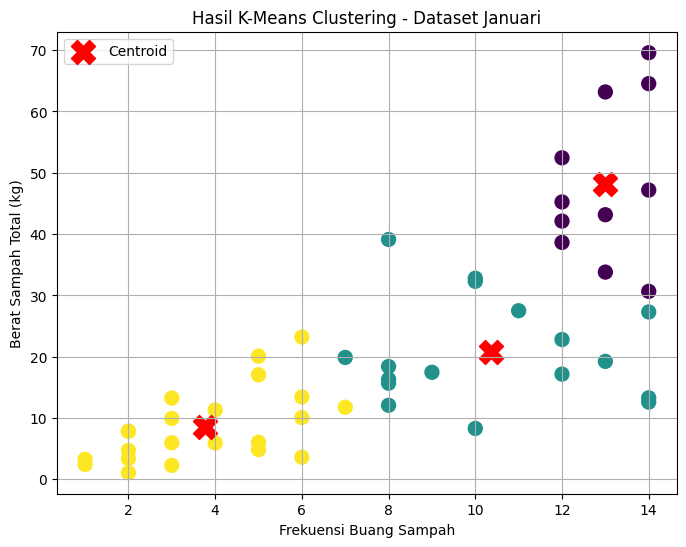

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data_asli_jan[:, 0], data_asli_jan[:, 1], c=cluster_labels, s=100, cmap='viridis')

centroids_denorm = centroids * (data_max_jan - data_min_jan) + data_min_jan

plt.scatter(centroids_denorm[:, 0], centroids_denorm[:, 1], c='red', s=300, marker='X', label='Centroid')
plt.title(f'Hasil K-Means Clustering - Dataset Januari')
plt.xlabel('Frekuensi Buang Sampah')
plt.ylabel('Berat Sampah Total (kg)')
plt.legend()
plt.grid(True)
plt.show()


### Normalisasi dataset pada bulan februari

In [262]:
data_februari = df_warga_februari.copy()

data_asli2 = data_februari[['Frekuensi Buang', 'Berat Sampah Total (kg)']].values

# Melakukan normalisasi data bulan januari
data_asli_feb = data_asli2.copy()
data_min_feb = data_asli_feb.min(axis=0)
data_max_feb = data_asli_feb.max(axis=0)

data_normalisasi_feb = (data_asli_feb - data_min_feb) / (data_max_feb - data_min_feb)

df_normalisasi_feb = pd.DataFrame(data_normalisasi_feb, columns=['Frekuensi Buang (sudah dinormalisasi)', 'Berat Sampah Total (kg) (sudah dinormalisasi)'])
df_normalisasi_feb['Warga'] = data_februari['Warga']

df_normalisasi_feb = df_normalisasi_feb[['Warga', 'Frekuensi Buang (sudah dinormalisasi)', 'Berat Sampah Total (kg) (sudah dinormalisasi)']]

print(f"\nData setelah dilakukannya normalisasi dengan sistem min dan max untuk dataset pada bulan februari :")
display(df_normalisasi_feb)



Data setelah dilakukannya normalisasi dengan sistem min dan max untuk dataset pada bulan februari :


,Warga,Frekuensi Buang (sudah dinormalisasi),Berat Sampah Total (kg) (sudah dinormalisasi)
0,warga_1,0.461538,0.094512
1,warga_2,0.846154,0.539393
2,warga_3,0.538462,0.216072
3,warga_4,0.384615,0.362007
4,warga_5,0.615385,0.648844
5,warga_6,0.615385,0.493159
6,warga_7,0.153846,0.191225
7,warga_8,0.076923,0.146249
8,warga_9,0.923077,0.169995
9,warga_10,0.538462,0.351942


### Algoritma K-Means Bulan Februari

In [263]:
K = 3
max_iter = 100
toleransi = 1e-4

centroids = np.array([
    [0.9, 0.8],  # centroid 3
    [0.6, 0.5],  # centroid 2
    [0.2, 0.3]  # centroid 1


])

def hitung_jarak(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

for iterasi in range(max_iter):
    cluster_labels = []
    for titik in data_normalisasi_feb:
        jarak_ke_centroid = [hitung_jarak(titik, centroid) for centroid in centroids]
        cluster_terdekat = np.argmin(jarak_ke_centroid)
        cluster_labels.append(cluster_terdekat)

    cluster_labels = np.array(cluster_labels)
    centroids_lama = centroids.copy()

    for k in range(K):
        anggota_cluster_k = data_normalisasi_feb[cluster_labels == k]
        if len(anggota_cluster_k) > 0:
            centroids[k] = np.mean(anggota_cluster_k, axis=0)

    if np.allclose(centroids, centroids_lama, atol=toleransi):
        print(f"Konvergen di iterasi ke-{iterasi + 1}")
        break

df_warga_februari['Cluster'] = cluster_labels

# =========================
# Keterangan cluster
# =========================
keterangan_cluster= {
    0: {'Kategori': 'Warga Sangat Aktif', 'Tindakan': 'Diberikan Voucher Makanan'},
    1: {'Kategori': 'Warga Aktif', 'Tindakan': 'Diberikan Poin Keaktifan'},
    2: {'Kategori': 'Warga Kurang Aktif', 'Tindakan': 'Diberikan sosialisasi'}
}

df_warga_februari['Kategori'] = df_warga_februari['Cluster'].map(lambda x: keterangan_cluster[x]['Kategori'])
df_warga_februari['Tindakan'] = df_warga_februari['Cluster'].map(lambda x: keterangan_cluster[x]['Tindakan'])

# =========================
# Tampilkan hasil clustering
# =========================
print(f"\nHasil Clustering Warga Februari:")
display(df_warga_februari[['Warga', 'Frekuensi Buang', 'Berat Sampah (kg)', 'Berat Sampah Total (kg)', 'Cluster', 'Kategori', 'Tindakan']])

rekap_cluster = df_warga_februari.groupby(['Cluster', 'Kategori', 'Tindakan']).size().reset_index(name='Jumlah_Warga')
rekap_cluster.insert(0, 'No', range(1, 1 + len(rekap_cluster)))

print(f"\n=== Rekap Jumlah Warga Tiap Cluster - Dataset Februari===")
display(rekap_cluster)

Konvergen di iterasi ke-2

Hasil Clustering Warga Februari:


,Warga,Frekuensi Buang,Berat Sampah (kg),Berat Sampah Total (kg),Cluster,Kategori,Tindakan
0,warga_1,7,0.93,6.51,2,Warga Kurang Aktif,Diberikan sosialisasi
1,warga_2,12,2.90,34.80,1,Warga Aktif,Diberikan Poin Keaktifan
2,warga_3,8,1.78,14.24,1,Warga Aktif,Diberikan Poin Keaktifan
3,warga_4,6,3.92,23.52,2,Warga Kurang Aktif,Diberikan sosialisasi
4,warga_5,9,4.64,41.76,1,Warga Aktif,Diberikan Poin Keaktifan
5,warga_6,9,3.54,31.86,1,Warga Aktif,Diberikan Poin Keaktifan
6,warga_7,3,4.22,12.66,2,Warga Kurang Aktif,Diberikan sosialisasi
7,warga_8,2,4.90,9.80,2,Warga Kurang Aktif,Diberikan sosialisasi
8,warga_9,13,0.87,11.31,1,Warga Aktif,Diberikan Poin Keaktifan
9,warga_10,8,2.86,22.88,1,Warga Aktif,Diberikan Poin Keaktifan



=== Rekap Jumlah Warga Tiap Cluster - Dataset Februari===


,No,Cluster,Kategori,Tindakan,Jumlah_Warga
0,1,0,Warga Sangat Aktif,Diberikan Voucher Makanan,3
1,2,1,Warga Aktif,Diberikan Poin Keaktifan,25
2,3,2,Warga Kurang Aktif,Diberikan sosialisasi,22


### Visualisasi Bulan Februari

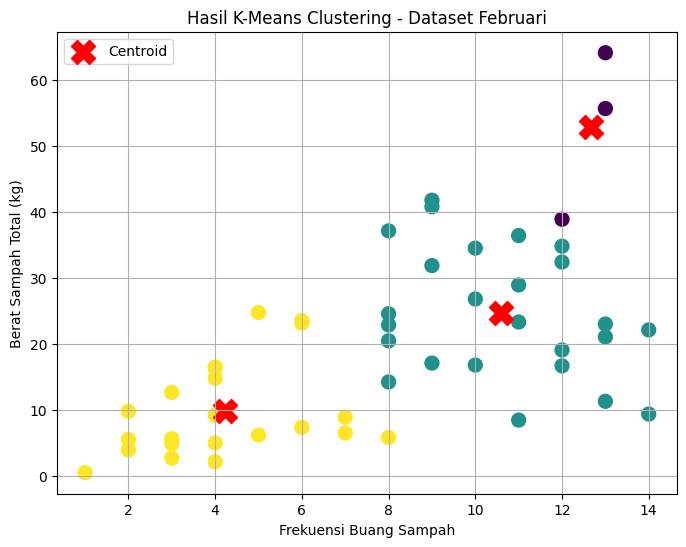

In [264]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data_asli_feb[:, 0], data_asli_feb[:, 1], c=cluster_labels, s=100, cmap='viridis')

centroids_denorm = centroids * (data_max_feb - data_min_feb) + data_min_feb

plt.scatter(centroids_denorm[:, 0], centroids_denorm[:, 1], c='red', s=300, marker='X', label='Centroid')
plt.title(f'Hasil K-Means Clustering - Dataset Februari')
plt.xlabel('Frekuensi Buang Sampah')
plt.ylabel('Berat Sampah Total (kg)')
plt.legend()
plt.grid(True)
plt.show()
